In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_dssalary_data.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average_salary,Company_text,State,True_hq,Company_age,python,rstudio,spark,aws,excel
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,49,1,0,0,0,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,12,1,0,1,0,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,57,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,24,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Per Hour', 'Employer Provided', 'max_salary', 'min_salary',
       'average_salary', 'Company_text', 'State', 'True_hq', 'Company_age',
       'python', 'rstudio', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
#job title senior or junior
#data scientist, data engineer, analyst, machine learning, manager, director

In [6]:
def job_specifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniriority_level(title):
    if 'senior' in title.lower() or 'sr.' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr.' in title.lower() or 'jr' in title.lower():
        return 'junior'
    else:
        return 'na'

In [7]:
df['seniority'] = df['Job Description'].apply(seniriority_level)

In [8]:
df['job_position'] = df['Job Description'].apply(job_specifier)

In [9]:
df['job_position'].value_counts()

data scientist    308
na                130
analyst           105
data engineer      81
mle                65
manager            33
director           20
Name: job_position, dtype: int64

In [10]:
#Description length
df['description_length'] = df['Job Description'].apply(lambda x:len(x))

In [11]:
df['description_length']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: description_length, Length: 742, dtype: int64

In [12]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [13]:
#No.of competitors
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != -1 else 0)

In [14]:
df['num_comp'].value_counts()

1    472
3    228
2     41
4      1
Name: num_comp, dtype: int64

In [15]:
#hourly wage to annual
df['min_salary'] = df.apply(lambda x:(x['min_salary']*2) if x['Per Hour'] == 1 else x['min_salary'],axis =1)
df['max_salary'] = df.apply(lambda x:(x['max_salary']*2) if x['Per Hour'] == 1 else x['max_salary'],axis =1)

In [16]:
print(df[['min_salary', 'max_salary', 'Per Hour']])
sum(df['min_salary']<df['max_salary'])

     min_salary  max_salary  Per Hour
0            53          91         0
1            63         112         0
2            80          90         0
3            56          97         0
4            86         143         0
..          ...         ...       ...
737          58         111         0
738          72         133         0
739          56          91         0
740          95         160         0
741          61         126         0

[742 rows x 3 columns]


742

In [17]:
df['average_salary'] = (df['max_salary']+df['min_salary'])/2

In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Per Hour', 'Employer Provided', 'max_salary', 'min_salary',
       'average_salary', 'Company_text', 'State', 'True_hq', 'Company_age',
       'python', 'rstudio', 'spark', 'aws', 'excel', 'seniority',
       'job_position', 'description_length', 'num_comp'],
      dtype='object')

In [19]:
df['Company_text'] = df['Company_text'].apply(lambda x:x.replace('\n',''))

In [20]:
pd.set_option('display.max_rows', None)

In [21]:
#EDA
df.describe()

,Rating,Founded,Per Hour,Employer Provided,max_salary,min_salary,average_salary,True_hq,Company_age,python,rstudio,spark,aws,excel,description_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,128.149596,74.719677,101.434636,0.557951,48.456873,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.673854
std,0.801210,497.183763,0.177034,0.149721,45.220324,30.980593,37.546122,0.496965,53.900445,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,16.000000,15.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,96.000000,52.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,124.000000,69.500000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,155.000000,91.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,306.000000,202.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


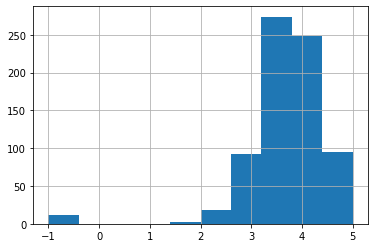

In [22]:
df.Rating.hist()

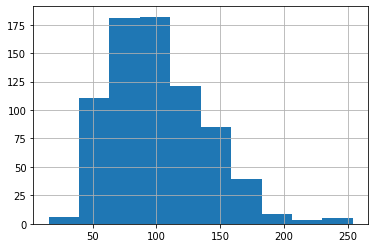

In [23]:
df['average_salary'].hist()

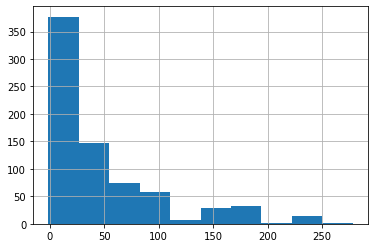

In [24]:
df['Company_age'].hist()

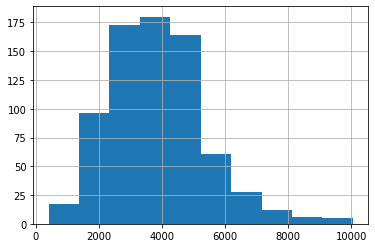

In [25]:
df.description_length.hist()

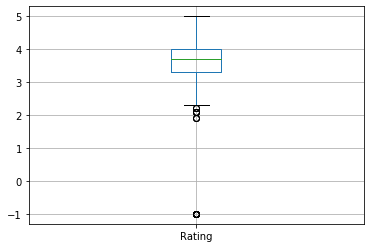

In [26]:
df.boxplot('Rating')

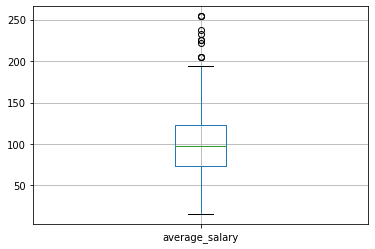

In [27]:
df.boxplot('average_salary')

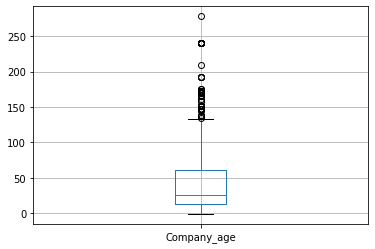

In [28]:
df.boxplot(['Company_age'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Per Hour            742 non-null    int64  
 15  Employer Provided   742 non-null    int64  
 16  max_sala

In [30]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Company_age,python,rstudio,spark,aws,excel,seniority,job_position,description_length,num_comp
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,0,1,na,data scientist,2536,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,0,senior,data scientist,4783,1
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,0,1,0,1,na,data scientist,3461,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,0,senior,mle,3883,3
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,0,1,senior,data scientist,2728,3


In [31]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numdf = df.select_dtypes(include=numerics)

In [32]:
numdf.columns

Index(['Rating', 'Founded', 'Per Hour', 'Employer Provided', 'max_salary',
       'min_salary', 'average_salary', 'True_hq', 'Company_age', 'python',
       'rstudio', 'spark', 'aws', 'excel', 'description_length', 'num_comp'],
      dtype='object')

In [33]:
chardf = df.select_dtypes(include = 'object')
chardf.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Company_text', 'State',
       'seniority', 'job_position'],
      dtype='object')

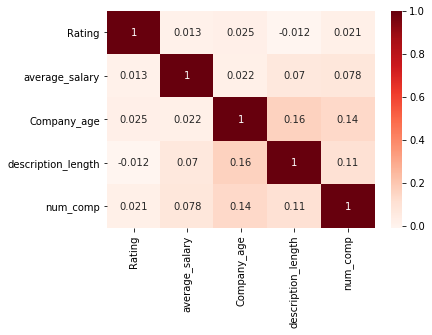

In [34]:
sns.heatmap(df[['Rating', 'average_salary', 'Company_age', 'description_length', 'num_comp']].corr(), cmap='Reds',
           annot = True)

In [35]:
df_cat = df[['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','Location', 'Headquarters','Company_text', 'State',
       'seniority', 'job_position','True_hq', 'Company_age', 'python',
       'rstudio', 'spark', 'aws', 'excel', 'description_length', 'num_comp']]

In [36]:
num = df['Size'].value_counts()

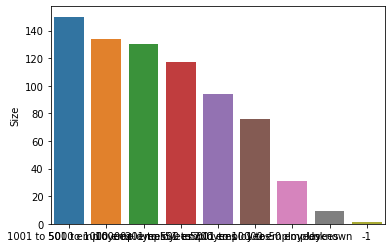

In [37]:
sns.barplot(x = num.index, y = num)

In [38]:
num.index

Index(['1001 to 5000 employees', '501 to 1000 employees', '10000+ employees',
       '201 to 500 employees', '51 to 200 employees',
       '5001 to 10000 employees', '1 to 50 employees', 'Unknown', '-1'],
      dtype='object')

In [39]:
num

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64

graph for Size: total = 9


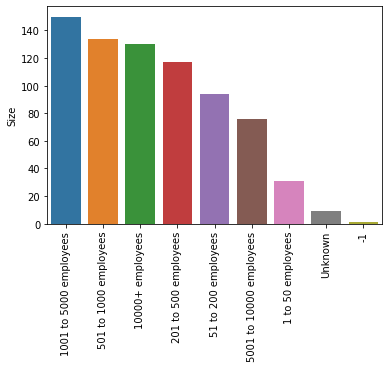

graph for Type of ownership: total = 11


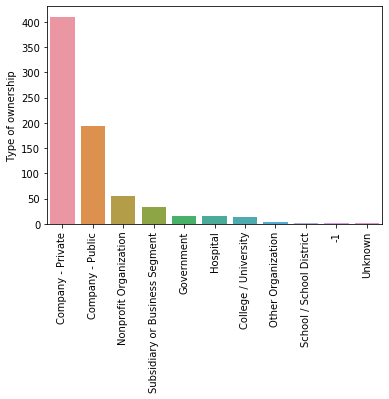

graph for Industry: total = 60


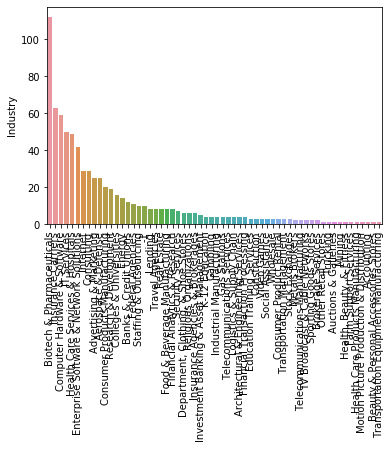

graph for Sector: total = 25


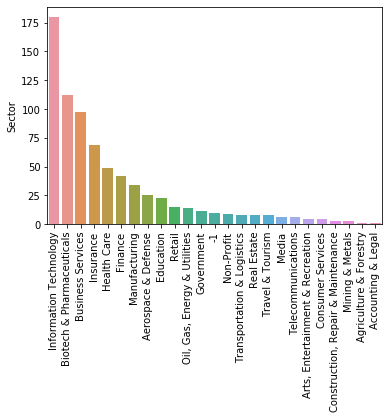

graph for Revenue: total = 14


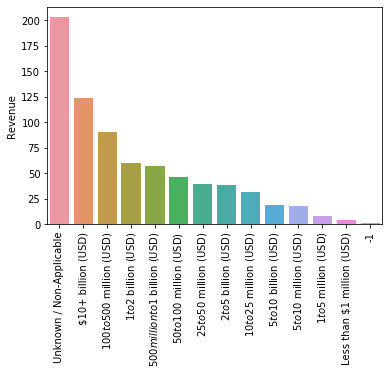

graph for Location: total = 200


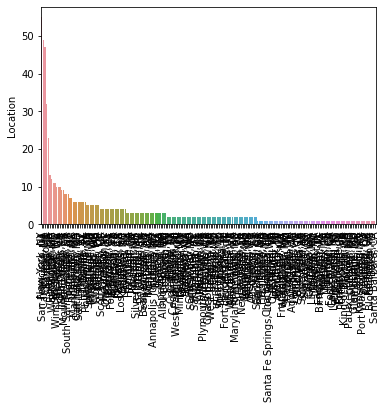

graph for Headquarters: total = 198


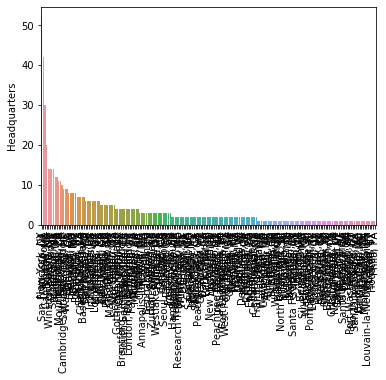

graph for Company_text: total = 343


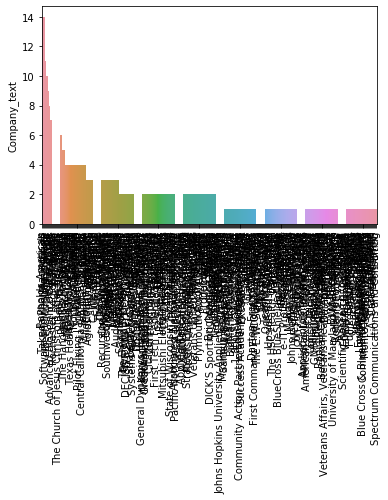

graph for State: total = 37


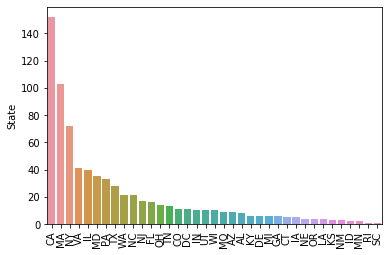

graph for seniority: total = 3


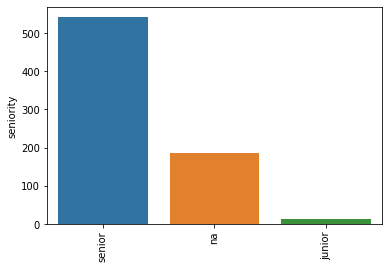

graph for job_position: total = 7


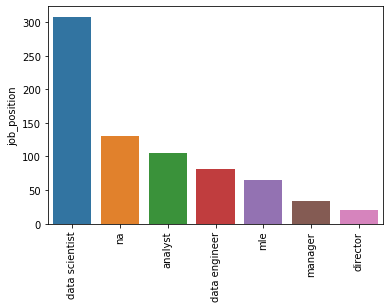

graph for True_hq: total = 2


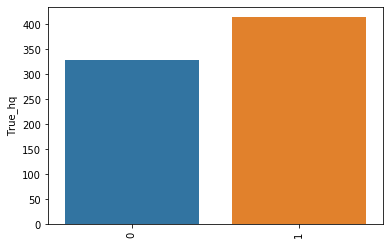

graph for Company_age: total = 102


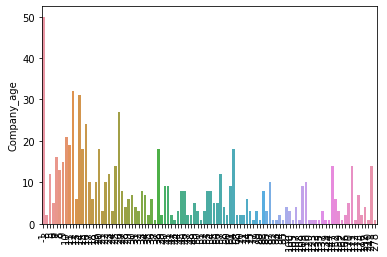

graph for python: total = 2


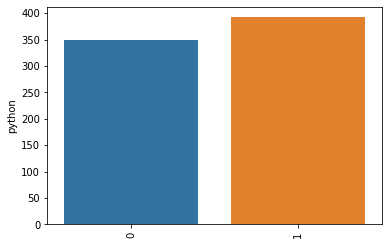

graph for rstudio: total = 2


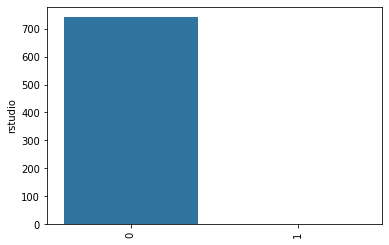

graph for spark: total = 2


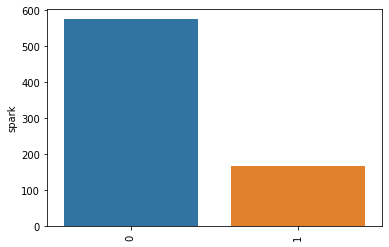

graph for aws: total = 2


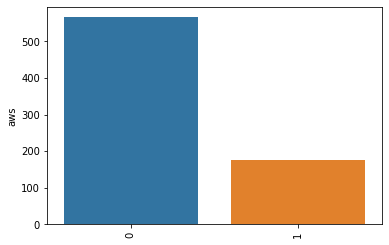

graph for excel: total = 2


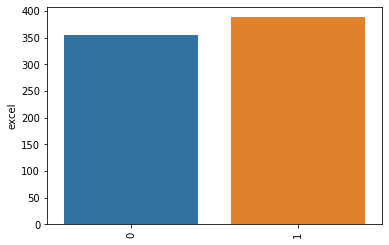

graph for description_length: total = 443


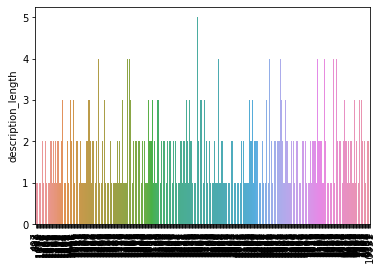

graph for num_comp: total = 4


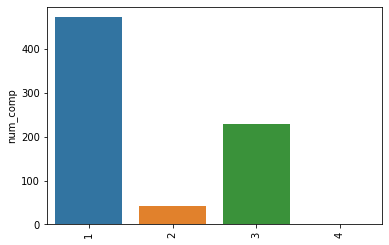

In [40]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

[Text(0, 0, 'Information Technology'),
 Text(0, 0, 'Biotech & Pharmaceuticals'),
 Text(0, 0, 'Business Services'),
 Text(0, 0, 'Insurance'),
 Text(0, 0, 'Health Care'),
 Text(0, 0, 'Finance'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Aerospace & Defense'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Oil, Gas, Energy & Utilities'),
 Text(0, 0, 'Government'),
 Text(0, 0, '-1'),
 Text(0, 0, 'Non-Profit'),
 Text(0, 0, 'Transportation & Logistics'),
 Text(0, 0, 'Real Estate'),
 Text(0, 0, 'Travel & Tourism'),
 Text(0, 0, 'Media'),
 Text(0, 0, 'Telecommunications'),
 Text(0, 0, 'Arts, Entertainment & Recreation'),
 Text(0, 0, 'Consumer Services'),
 Text(0, 0, 'Construction, Repair & Maintenance'),
 Text(0, 0, 'Mining & Metals'),
 Text(0, 0, 'Agriculture & Forestry'),
 Text(0, 0, 'Accounting & Legal')]

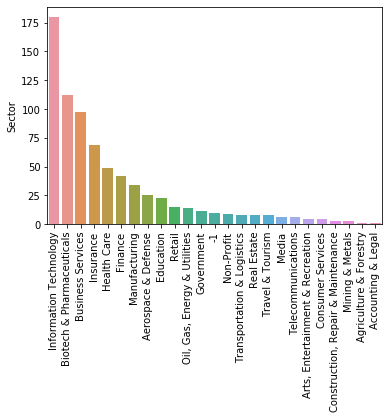

In [57]:
plot1 = sns.barplot(x = df["Sector"].value_counts().index, y = df["Sector"].value_counts(), data = df)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Per Hour            742 non-null    int64  
 15  Employer Provided   742 non-null    int64  
 16  max_sala

In [42]:
pd.pivot_table(df, index = 'job_position', values = 'average_salary').sort_values('average_salary', ascending = False )

,average_salary
job_position,
data scientist,116.816558
mle,106.353846
data engineer,104.623457
manager,91.772727
na,88.692308
director,87.425000
analyst,72.290476


In [43]:
pd.pivot_table(df, index = ['job_position', 'seniority'], values = 'average_salary').sort_values('average_salary', ascending = False )

average_salary
job_position   seniority                
data scientist senior         119.313596
               junior         118.416667
               na             108.161765
mle            na             107.105263
data engineer  senior         106.836207
mle            senior         106.043478
data engineer  na              99.043478
na             senior          97.011765
director       senior          95.781250
manager        senior          93.145161
analyst        senior          74.717949
na             na              72.977778
manager        na              70.500000
analyst        junior          68.000000
               na              65.173077
director       na              54.000000

In [44]:
pd.pivot_table(df, index = ['State'], values = 'average_salary').sort_values('average_salary', ascending = False )

,average_salary
State,
CA,123.513158
IL,116.662500
DC,110.181818
MA,107.412621
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [45]:
pd.pivot_table(df, index = ['Sector'], values = 'average_salary').sort_values('average_salary', ascending = False )

,average_salary
Sector,
Media,116.666667
-1,114.650000
Accounting & Legal,113.500000
Information Technology,113.191667
Biotech & Pharmaceuticals,112.098214
Insurance,105.942029
Real Estate,104.750000
Mining & Metals,104.000000
Telecommunications,102.333333


In [50]:
pd.pivot_table(df[df['job_position'] == 'data scientist'], index = ['Sector'], values = 'average_salary').sort_values('average_salary', ascending = False )


,average_salary
Sector,
Telecommunications,142.000000
Information Technology,128.505882
Biotech & Pharmaceuticals,126.687500
Education,125.250000
Retail,122.300000
Media,115.375000
Insurance,114.932432
Aerospace & Defense,114.772727
Health Care,113.350000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Per Hour            742 non-null    int64  
 15  Employer Provided   742 non-null    int64  
 16  max_sala

In [48]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'Per Hour', 'python', 'rstudio', 'spark', 'aws', 'excel','average_salary']]
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'average_salary').sort_values('average_salary', ascending = False))

Rating
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 4.0        107.170213
 3.2        106.928571
 3.7        105.680328
 3.5        104.897959
 4.7        103.983871
 3.3        103.897436
 4.3        102.468750
 4.2        100.442308
 2.2         97.750000
 3.8         97.418033
 4.6         97.250000
 2.1         95.900000
 3.4         93.465909
 3.6         89.945652
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 2.7         85.178571
 2.8         83.928571
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Industry
                                          average_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.0000

ValueError: Grouper for 'average_salary' not 1-dimensional

In [ ]:
df

In [ ]:
df.to_csv('eda_data.csv', index = False)